# EDA

### What has been done:
[1. Overview](#1-overview)  
[2. Data Cleaning](#2-data-cleaning)  
[3. Graph and Statistics for each variable](#3-graph-and-statistics-for-each-variable)  
[4. Correlations](#4-correlations)  
&nbsp;&nbsp;&nbsp;[4.1 Positive correlations](#41-positive-correlations)  
&nbsp;&nbsp;&nbsp;[4.2 Negative correlations](#42-negative-correlations)

### Link: [Eyesight and vision health synthetic dataset - kaggle](https://www.kaggle.com/datasets/mabubakrsiddiq/eyesight-and-vision-health-synthetic-dataset)

### Columns definition:
1. id – Unique identifier for each record.

2. exercise_hours – Weekly hours of physical exercise (0–14).

3. mental_health_score – Mental well-being score ranging from 0–100.

4. screen_time_hours – Daily digital screen usage in hours (0–16).

5. screen_brightness_avg – Average screen brightness used, measured in percentage (0–100).

6. age – Age of the individual (5–80).

7. height_cm – Height in centimeters (140–200).

8. outdoor_light_exposure_hours – Daily hours spent outdoors in natural light (0–5).

9. night_mode_usage – Percentage of screen time spent with night mode enabled (0–100).

10. screen_distance_cm – Average screen viewing distance in centimeters (20–80).

11. glasses_number – Strength of prescription glasses.

12. eye_health_score – Final synthetic eye health score (0–100), influenced by lifestyle and screen habits.


In [3]:
# !pip install seaborn

In [4]:
# import dataset
import pandas as pd
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Download the dataset using your provided command
path = kagglehub.dataset_download("mabubakrsiddiq/eyesight-and-vision-health-synthetic-dataset")

# Find the actual CSV file inside the downloaded directory
csv_file = [f for f in os.listdir(path) if f.endswith('.csv')][0]
file_path = os.path.join(path, csv_file)

# Load the dataset into a Pandas DataFrame
df = pd.read_csv(file_path)

# 1. Overview

In [5]:
# the df as 1000 rows and 13 columns
df

Unnamed: 0     id  exercise_hours  mental_health_score  \
0              0      1        3.441116            50.112741   
1              1      2        7.494288            66.181801   
2              2      3        2.733887            69.674360   
3              3      4        8.122516            70.996764   
4              4      5        1.769984            50.017834   
...          ...    ...             ...                  ...   
9995        9995   9996        1.338703            56.768322   
9996        9996   9997        0.525389            85.442520   
9997        9997   9998        3.190260            87.468755   
9998        9998   9999        7.222904            74.331541   
9999        9999  10000        1.737612            94.941119   

      screen_time_hours  screen_brightness_avg  age   height_cm  \
0              4.387540              68.531464   56  172.766324   
1              9.596943              54.460165   19  180.683155   
2             12.272036              74.334277   76  185.319068   
3              8.820065              56.450697   65  166.770667   
4             10.962927              87.181496   25  165.203603   
...                 ...                    ...  ...         ...   
9995           0.854225              58.164274   11  143.559342   
9996           6.889407              86.873212   41  179.409140   
9997           7.796498              63.268931   57  180.484107   
9998           3.556995              84.804226   22  159.375346   
9999           1.816635              67.509092   42  160.656867   

      outdoor_light_exposure_hours  night_mode_usage  screen_distance_cm  \
0                         1.821210         79.091607           33.408167   
1                         0.455726         90.535187           54.127821   
2                         0.301454         11.488773           50.769790   
3                         1.226576         83.373275           51.267787   
4                         0.521827         89.394952           54.595573   
...                            ...               ...                 ...   
9995                      0.407882         74.331800           63.556015   
9996                      4.117332         29.781284           37.564927   
9997                      2.321639         76.794358           52.927722   
9998                      2.794297         76.676388           43.333935   
9999                      0.812032         78.536924           54.429241   

      glasses_number  eye_health_score  
0                  3         45.492089  
1                  0         74.610049  
2                  0         52.643897  
3                  2         65.963707  
4                  0         66.109601  
...              ...               ...  
9995               0         75.669820  
9996               3         51.730746  
9997               2         61.402673  
9998               0         74.063825  
9999               0         77.180721  

[10000 rows x 13 columns]

In [6]:
# type of information in each column
df.info()

# from the info we can see that all the columns are numerical and there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    10000 non-null  int64  
 1   id                            10000 non-null  int64  
 2   exercise_hours                10000 non-null  float64
 3   mental_health_score           10000 non-null  float64
 4   screen_time_hours             10000 non-null  float64
 5   screen_brightness_avg         10000 non-null  float64
 6   age                           10000 non-null  int64  
 7   height_cm                     10000 non-null  float64
 8   outdoor_light_exposure_hours  10000 non-null  float64
 9   night_mode_usage              10000 non-null  float64
 10  screen_distance_cm            10000 non-null  float64
 11  glasses_number                10000 non-null  int64  
 12  eye_health_score              10000 non-null  float64
dtypes:

In [7]:
#summary statistics of the dataset
df.describe()   

Unnamed: 0           id  exercise_hours  mental_health_score  \
count  10000.00000  10000.00000    10000.000000         10000.000000   
mean    4999.50000   5000.50000        2.961471            69.679597   
std     2886.89568   2886.89568        2.406236            14.822249   
min        0.00000      1.00000        0.005431            13.284606   
25%     2499.75000   2500.75000        1.197107            59.708334   
50%     4999.50000   5000.50000        2.325666            69.844723   
75%     7499.25000   7500.25000        4.083642            80.029588   
max     9999.00000  10000.00000       14.000000           100.000000   

       screen_time_hours  screen_brightness_avg           age     height_cm  \
count       10000.000000           10000.000000  10000.000000  10000.000000   
mean            5.889077              64.816799     42.534500    165.491449   
std             3.869003              14.867468     21.892659     14.899597   
min             0.040976               8.341404      5.000000    116.738759   
25%             2.902230              54.874227     23.000000    159.181176   
50%             5.001493              64.631378     42.000000    167.746996   
75%             8.066263              74.916001     62.000000    175.354982   
max            16.000000             100.000000     80.000000    200.000000   

       outdoor_light_exposure_hours  night_mode_usage  screen_distance_cm  \
count                  10000.000000      10000.000000        10000.000000   
mean                       1.178173         50.012725           50.118982   
std                        1.118168         31.569668           11.774423   
min                        0.000336          0.000000           20.000000   
25%                        0.352160         20.001045           42.036132   
50%                        0.831438         49.983036           50.044781   
75%                        1.639920         80.225564           58.100950   
max                        5.000000        100.000000           80.000000   

       glasses_number  eye_health_score  
count    10000.000000      10000.000000  
mean         0.943500         65.303774  
std          1.054049         11.802246  
min          0.000000         21.679611  
25%          0.000000         57.204050  
50%          1.000000         65.509679  
75%          2.000000         73.742798  
max          3.000000        100.000000

# 2. Data Cleaning

In [8]:
# 1️⃣ Check if values in column "id" are in strictly increasing order
is_increasing = df['id'].is_monotonic_increasing

print("IDs are in increasing order:", is_increasing)


# OPTIONAL (if you want strictly increasing without equal values)
is_strictly_increasing = (df['id'].diff().dropna() > 0).all()

print("IDs are strictly increasing (no equal consecutive values):", is_strictly_increasing)


# 2️⃣ Check for duplicates in column "id"
num_duplicates = df.duplicated(subset=['id']).sum()

print("Number of duplicate IDs:", num_duplicates)


# OPTIONAL: show duplicate rows if they exist
duplicate_rows = df[df.duplicated(subset=['id'], keep=False)]

if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows.sort_values('id'))
else:
    print("No duplicate IDs found.")

IDs are in increasing order: True
IDs are strictly increasing (no equal consecutive values): True
Number of duplicate IDs: 0
No duplicate IDs found.


In [9]:
# 1️⃣ Check if values in column "Unnamed: 0" are in strictly increasing order
is_increasing = df['Unnamed: 0'].is_monotonic_increasing

print("Unnamed: 0 are in increasing order:", is_increasing)


# OPTIONAL (if you want strictly increasing without equal values)
is_strictly_increasing = (df['Unnamed: 0'].diff().dropna() > 0).all()

print("Unnamed: 0 are strictly increasing (no equal consecutive values):", is_strictly_increasing)


# 2️⃣ Check for duplicates in column "Unnamed: 0"
num_duplicates = df.duplicated(subset=['Unnamed: 0']).sum()

print("Number of duplicate Unnamed: 0:", num_duplicates)


# OPTIONAL: show duplicate rows if they exist
duplicate_rows = df[df.duplicated(subset=['Unnamed: 0'], keep=False)]

if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows.sort_values('Unnamed: 0'))
else:
    print("No duplicate Unnamed: 0 found.")

Unnamed: 0 are in increasing order: True
Unnamed: 0 are strictly increasing (no equal consecutive values): True
Number of duplicate Unnamed: 0: 0
No duplicate Unnamed: 0 found.


"Unnamed: 0", will be removed because it only contains sequential numbers ranging from 0 to 9999 and does not provide useful information. The "id" column, which ranges from 1 to 1000, will be retained as the unique identifier.

In [10]:
# remove the column Unnamed: 0
df = df.drop(columns=['Unnamed: 0'])

#now we have 1000 rows and 12 columns

In [11]:
df

id  exercise_hours  mental_health_score  screen_time_hours  \
0         1        3.441116            50.112741           4.387540   
1         2        7.494288            66.181801           9.596943   
2         3        2.733887            69.674360          12.272036   
3         4        8.122516            70.996764           8.820065   
4         5        1.769984            50.017834          10.962927   
...     ...             ...                  ...                ...   
9995   9996        1.338703            56.768322           0.854225   
9996   9997        0.525389            85.442520           6.889407   
9997   9998        3.190260            87.468755           7.796498   
9998   9999        7.222904            74.331541           3.556995   
9999  10000        1.737612            94.941119           1.816635   

      screen_brightness_avg  age   height_cm  outdoor_light_exposure_hours  \
0                 68.531464   56  172.766324                      1.821210   
1                 54.460165   19  180.683155                      0.455726   
2                 74.334277   76  185.319068                      0.301454   
3                 56.450697   65  166.770667                      1.226576   
4                 87.181496   25  165.203603                      0.521827   
...                     ...  ...         ...                           ...   
9995              58.164274   11  143.559342                      0.407882   
9996              86.873212   41  179.409140                      4.117332   
9997              63.268931   57  180.484107                      2.321639   
9998              84.804226   22  159.375346                      2.794297   
9999              67.509092   42  160.656867                      0.812032   

      night_mode_usage  screen_distance_cm  glasses_number  eye_health_score  
0            79.091607           33.408167               3         45.492089  
1            90.535187           54.127821               0         74.610049  
2            11.488773           50.769790               0         52.643897  
3            83.373275           51.267787               2         65.963707  
4            89.394952           54.595573               0         66.109601  
...                ...                 ...             ...               ...  
9995         74.331800           63.556015               0         75.669820  
9996         29.781284           37.564927               3         51.730746  
9997         76.794358           52.927722               2         61.402673  
9998         76.676388           43.333935               0         74.063825  
9999         78.536924           54.429241               0         77.180721  

[10000 rows x 12 columns]

# 3. Grapth and Statistics for each variable

In [12]:
def plot_distribution(df, column, bins=20):
    """
    Plots a histogram with KDE, mean, and median lines for a given numeric column.
    
    Parameters:
        df (DataFrame): The dataset.
        column (str): The column name to visualize.
        bins (int): Number of histogram bins.
    """
    
    # Remove grid style
    sns.set(style="ticks")
    
    # Compute mean and median
    mean_val = df[column].mean()
    median_val = df[column].median()
    
    # Create the figure
    plt.figure(figsize=(10, 6))
    
    # Histogram + KDE trend line
    sns.histplot(df[column], bins=bins, kde=True, color='skyblue')
    
    # Vertical line for the mean
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2,
                label=f"Mean = {mean_val:.2f}")
    
    # Vertical line for the median
    plt.axvline(median_val, color='green', linestyle='-', linewidth=2,
                label=f"Median = {median_val:.2f}")
    
    # Labels and title
    plt.title(f"Distribution of {column.replace('_', ' ').title()}")
    plt.xlabel(column.replace('_', ' ').title())
    plt.ylabel("Frequency")
    plt.legend()
    
    plt.show()


/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


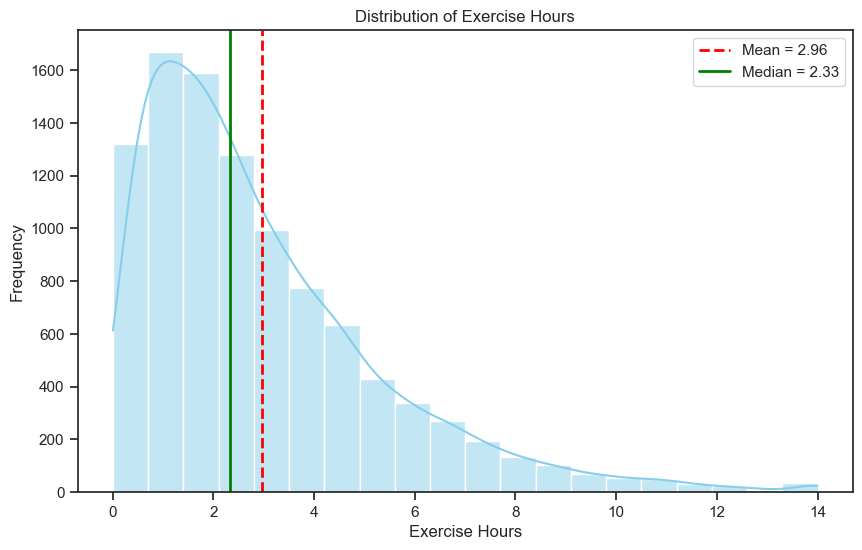

In [13]:
# histogram of the column exercise_hours to see the distribution of the individual's exercise hours in a week.
plot_distribution(df, "exercise_hours")

/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


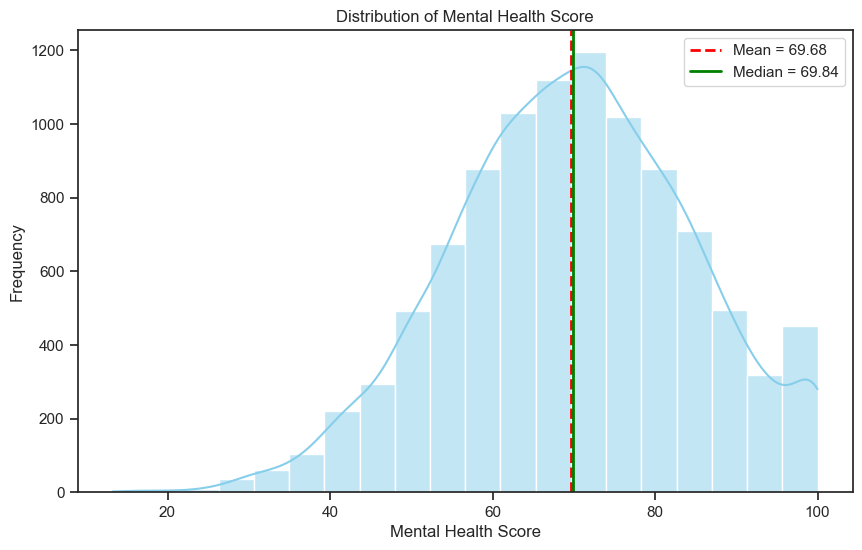

In [14]:
# histogram of the column mental_health_score to see the distribution of the individual's mental health score.
plot_distribution(df,'mental_health_score')

/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


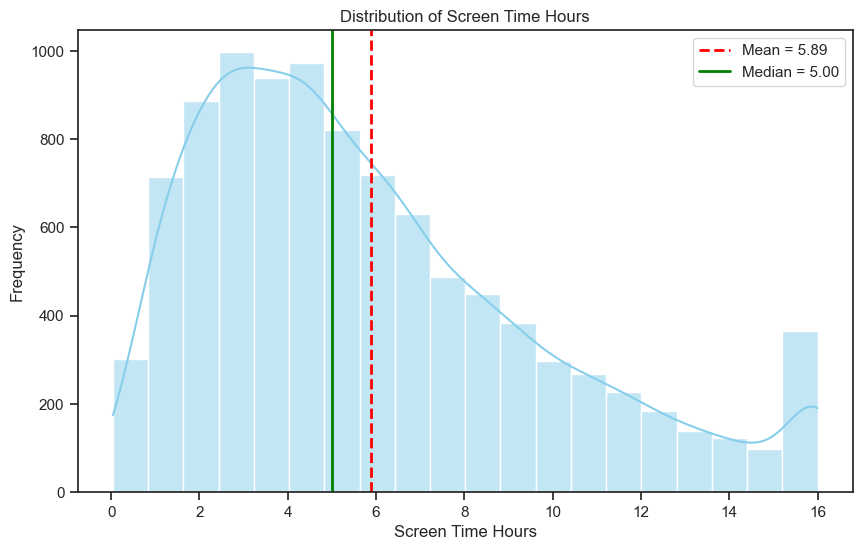

In [15]:
# histogram of the column screen_time_hours to see the distribution of the individual's screen time hours.
plot_distribution(df,'screen_time_hours')

/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


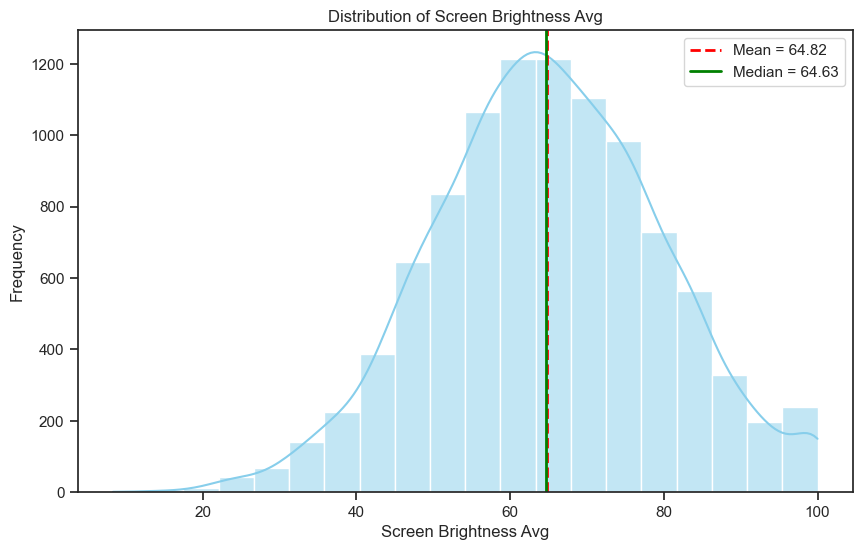

In [16]:
# histogram of the column screen_brightness_avg to see the distribution of the individual's screen brightness average.
plot_distribution(df,'screen_brightness_avg')

/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


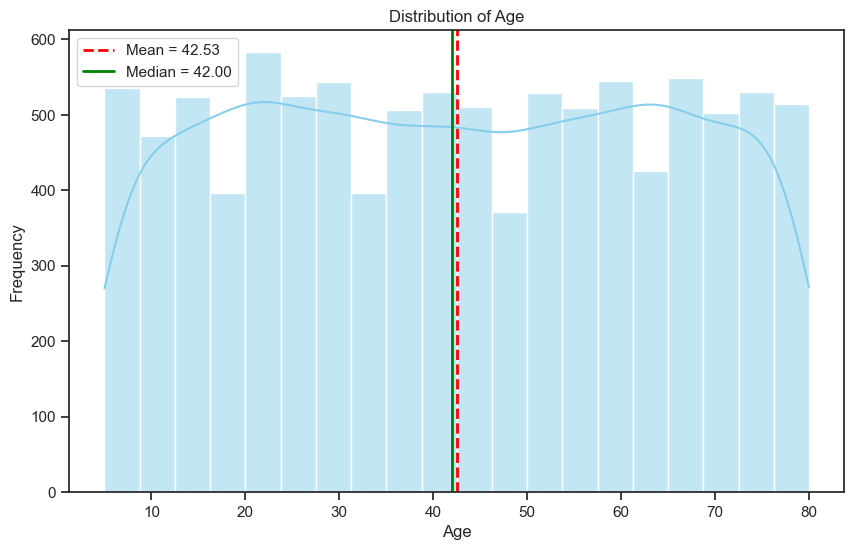

In [17]:
# histogram of the column age to see the distribution of the individual's age.
plot_distribution(df,'age')

/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


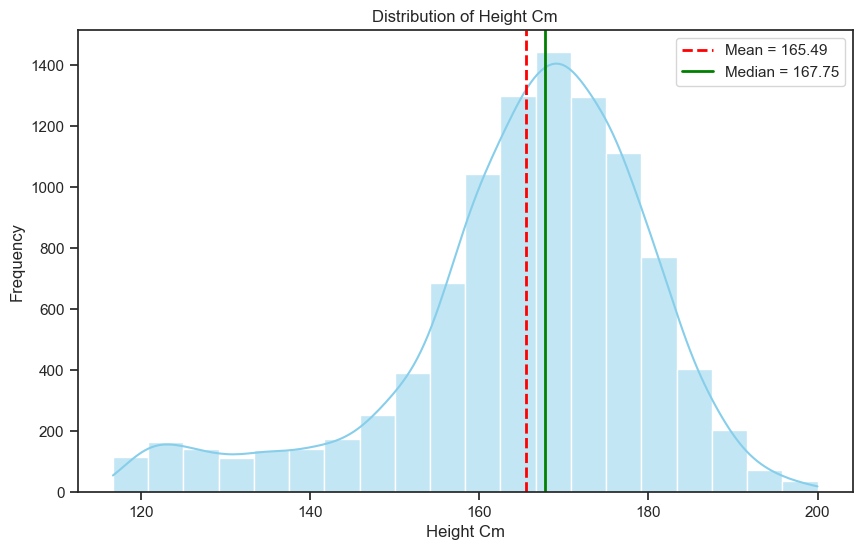

In [18]:
# histogram of the column height_cm to see the distribution of the individual's height in cm.
plot_distribution(df,'height_cm')

/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


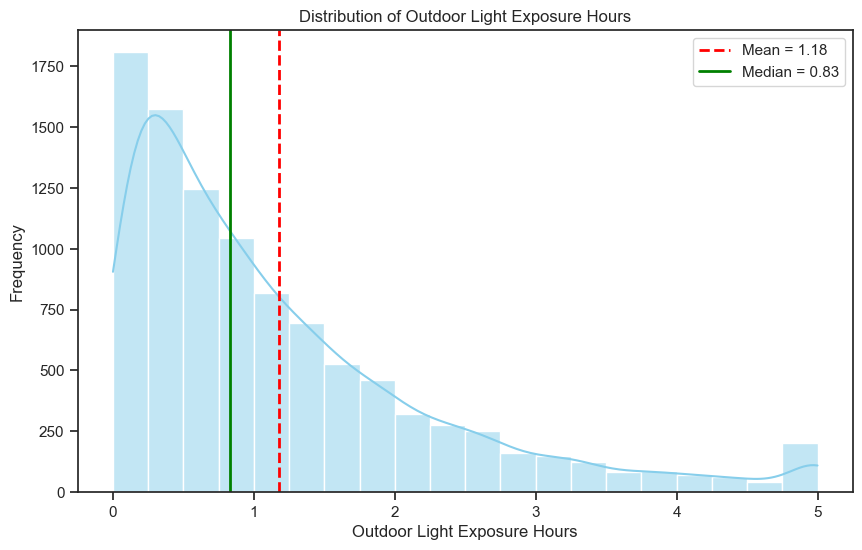

In [19]:
# histogram of the column outdoor_light_exposure_hours to see the distribution of the individual's outdoor light exposure hours.
plot_distribution(df,'outdoor_light_exposure_hours')

/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


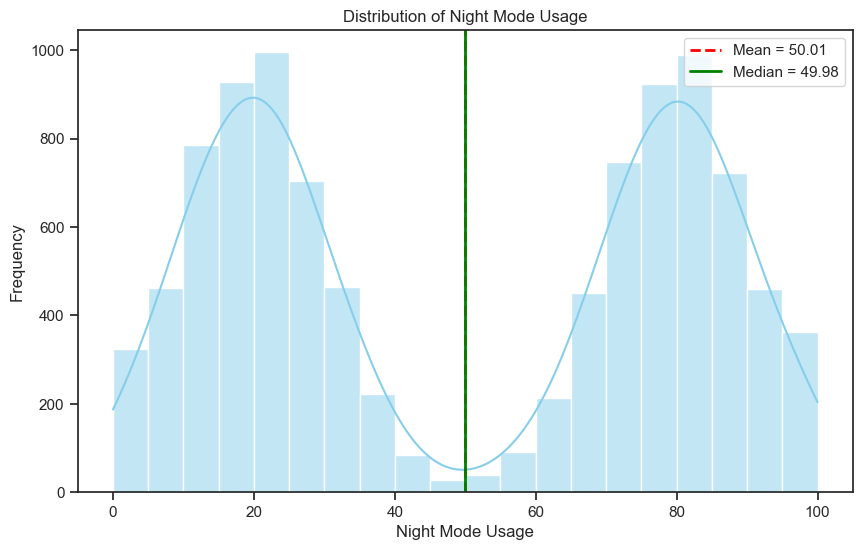

In [20]:
# histogram of the column night_mode_usage to see the distribution of the individual's night mode usage.
plot_distribution(df,'night_mode_usage')

/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


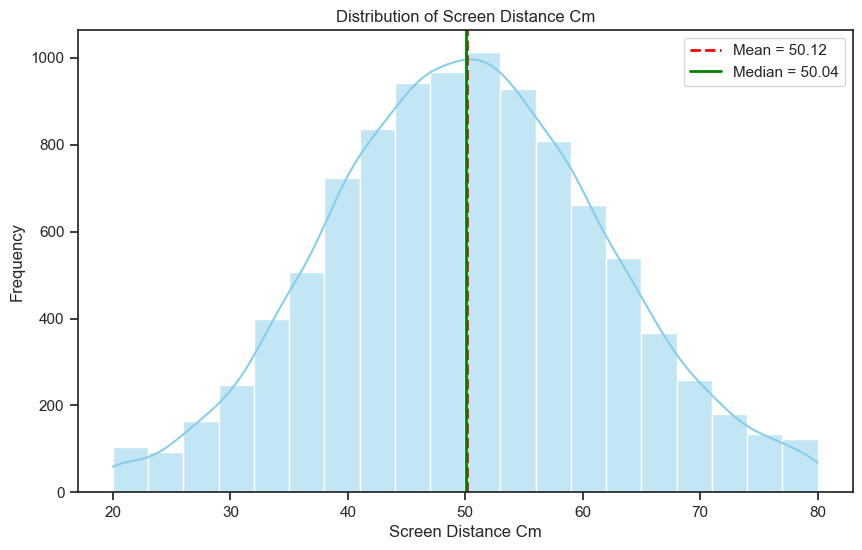

In [21]:
# histogram of the column screen_distance_cm to see the distribution of the individual's screen distance in cm.
plot_distribution(df,'screen_distance_cm')

/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


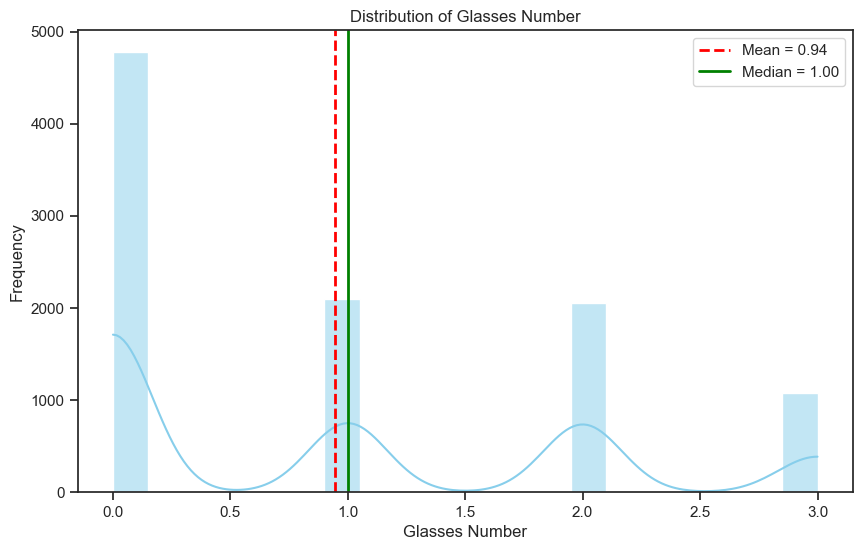

In [22]:
# histogram of the column glasses_number to see the distribution of the individual's glasses number.
plot_distribution(df,'glasses_number')

/Users/korbiniandietl/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


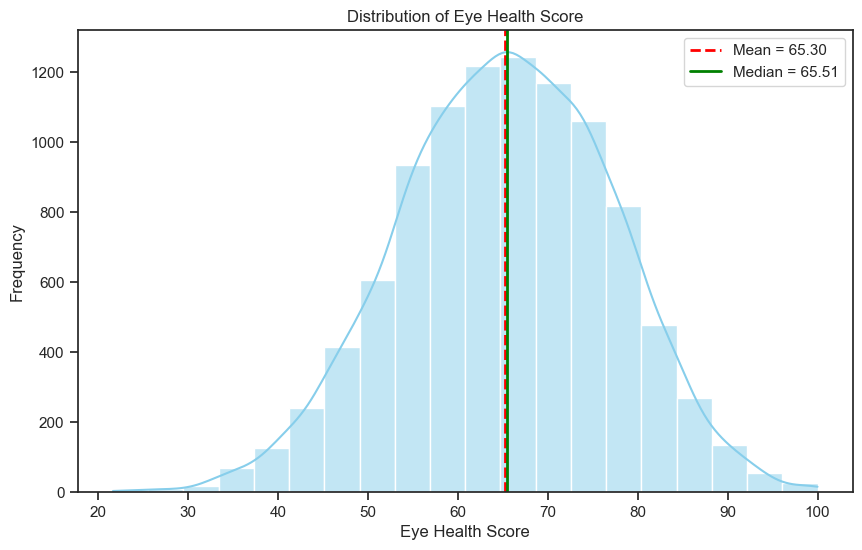

In [23]:
# histogram of the column eye_health_score to see the distribution of the individual's eye health score.
plot_distribution(df,'eye_health_score')

# 4. Correlations

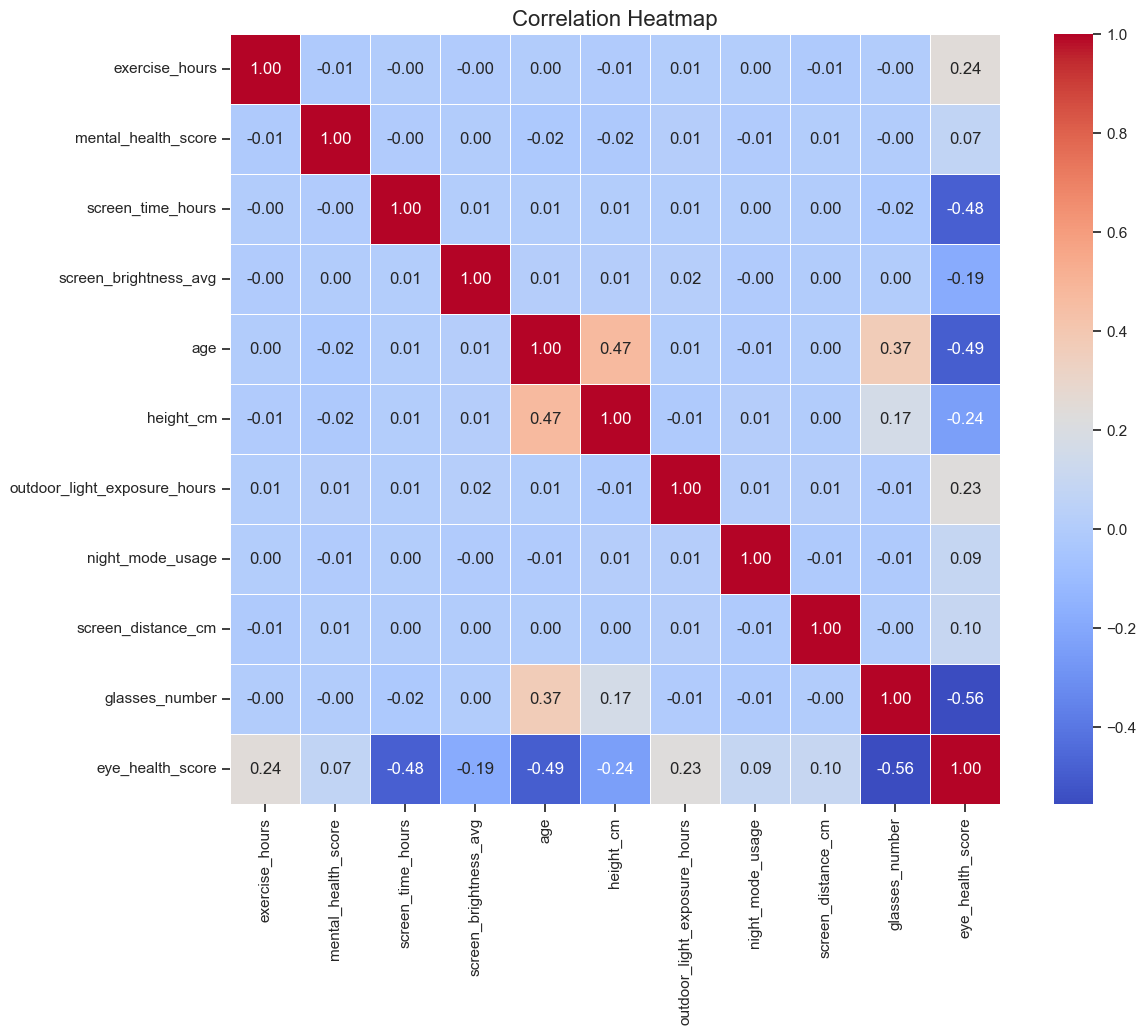

In [24]:
# --- Correlation Heatmap (excluding the 'id' column) ---
# 1. Remove the 'id' column from the correlation matrix
corr_matrix = df.drop(columns=["id"]).corr()

# 2. Create the heatmap
plt.figure(figsize=(14, 10))

sns.heatmap(
    corr_matrix,
    annot=True,          # show correlation values
    cmap="coolwarm",     # color palette
    fmt=".2f",           # number formatting
    linewidths=0.5,      # thin lines between cells
    square=True          # make cells square-shaped
)

# 3. Add title
plt.title("Correlation Heatmap", fontsize=16)

# 4. Display the plot
plt.show()

The correlation matrix shows a moderate positive relationship between age and height_cm (0.47), as well as a weaker positive correlation between age and glasses_number (0.37).

There is a negative correlation between:
- screen_time_hours and eye_health_score (-0.48)
- age and eye_health_score (-0.49)
- glasses_number and eye_health_score (-0.56)

altri fattori che sembra abbiano un impatto positivo sulla variabile eye_health_score, sono:
- exercise_hours per un valore della correlazionedi 0.24
- outdoor_light_exposure_hours per un valore di 0.23


## 4.1 Positive correlations

In [25]:
def plot_inverse_relationship(df, x, y):
    """
    Creates a clean and highly readable plot that highlights
    the inverse relationship between two variables using a 
    scatter plot, regression line, and correlation annotation.
    """

    sns.set(style="whitegrid", context="talk")

    plt.figure(figsize=(13, 7))

    # Scatter + regression line
    sns.regplot(
        data=df,
        x=x,
        y=y,
        scatter_kws={
            "alpha": 0.6,
            "color": "#2a6f97",
            "s": 80,
            "edgecolor": "white"
        },
        line_kws={
            "color": "#d00000",
            "linewidth": 3
        }
    )

    # Compute correlation
    corr = df[[x, y]].corr().iloc[0, 1]

    # Title and axis labels
    plt.title(
        f"Relationship between {x.replace('_', ' ').title()} and {y.replace('_', ' ').title()}",
        fontsize=22,
        pad=20
    )
    plt.xlabel(x.replace("_", " ").title(), fontsize=18)
    plt.ylabel(y.replace("_", " ").title(), fontsize=18)

    # Correlation annotation (TOP RIGHT)
    plt.text(
        0.98, 0.98,
        f"Correlation: {corr:.2f}",
        transform=plt.gca().transAxes,
        fontsize=17,
        weight="bold",
        horizontalalignment="right",
        verticalalignment="top",
        bbox=dict(
            boxstyle="round,pad=0.4",
            facecolor="white",
            edgecolor="#555",
            alpha=0.9
        )
    )

    # Grid improvement
    plt.grid(True, linestyle="--", alpha=0.4)

    plt.tight_layout()
    plt.show()


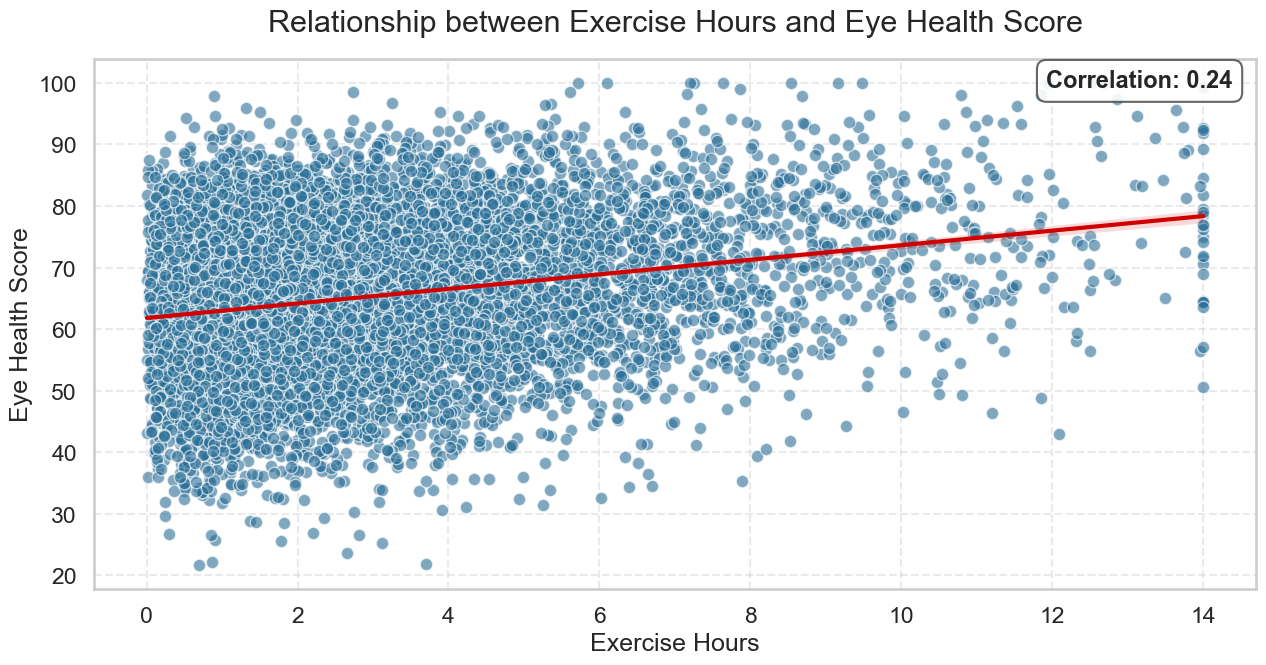

In [26]:
plot_inverse_relationship(df, "exercise_hours", "eye_health_score")

The figure shows a weak positive relationship between exercise hours and eye health score, with a correlation of approximately 0.24. On average, higher levels of exercise are associated with slightly better eye health outcomes, as indicated by the upward trend line. However, the relationship appears relatively modest compared to the previous variables, and the wide dispersion of observations suggests substantial individual variability. This indicates that while exercise may contribute positively to eye health, it is likely only one of several factors influencing the observed outcomes.

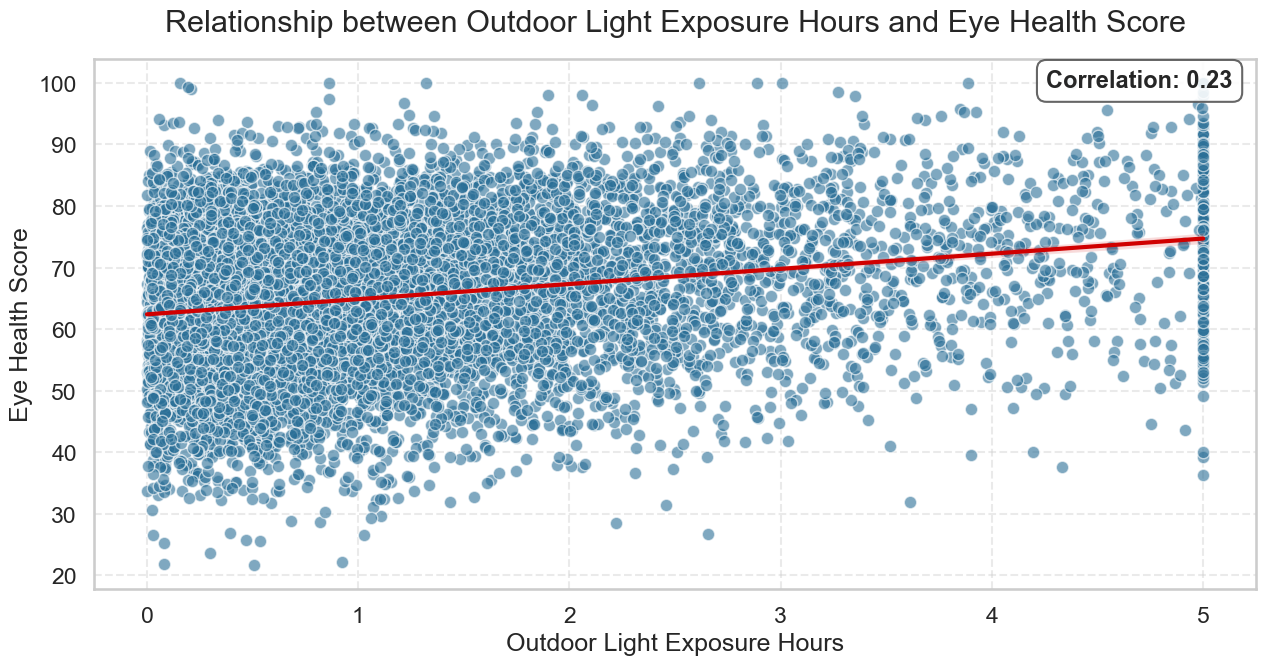

In [27]:
plot_inverse_relationship(df, "outdoor_light_exposure_hours", "eye_health_score")

This figure suggests a weak positive association between outdoor light exposure and eye health score, with a correlation of approximately 0.23. Individuals who spend more time outdoors tend to report slightly higher eye health scores, as reflected in the upward-sloping trend line.

Nevertheless, the substantial spread of observations indicates that outdoor exposure explains only a limited portion of the variation in eye health.

The two graphs appear very similar both in terms of visual structure and the strength of their relationship with the eye health score. This similarity could initially suggest that the variables capture related aspects of behaviour or reflect a common underlying factor influencing eye health. In some cases, such patterns may indicate hidden relationships between predictors or raise concerns about potential multicollinearity, especially if the variables tend to move together.

However, the correlation between exercise hours and outdoor light exposure is approximately 0.01, indicating that they are essentially unrelated. This suggests that the visual similarity between the plots does not arise from overlap between the predictors. Instead, it is more likely that both variables independently show weak positive associations with eye health, leading to comparable graphical patterns. Therefore, despite their similar appearance, the two variables should be interpreted as distinct factors rather than as redundant or highly collinear predictors.

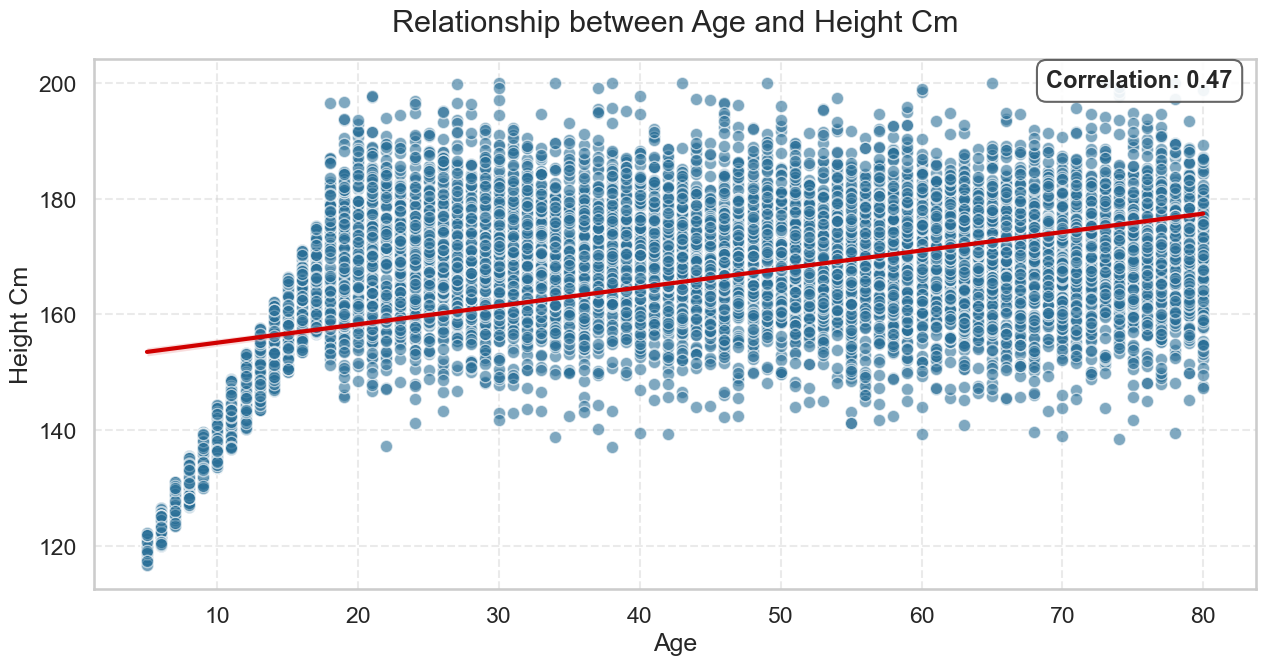

In [28]:
plot_inverse_relationship(df, "age", "height_cm")

As expected, height increases with age until approximately 20 years, reflecting the natural developmental growth phase. Beyond this stage, height tends to stabilize and shows little variation with further aging. Growth patterns appear relatively consistent during childhood, while individual differences become more evident after adolescence and persist into adulthood, even though overall height remains stable.

## 4.2 Negative correlations

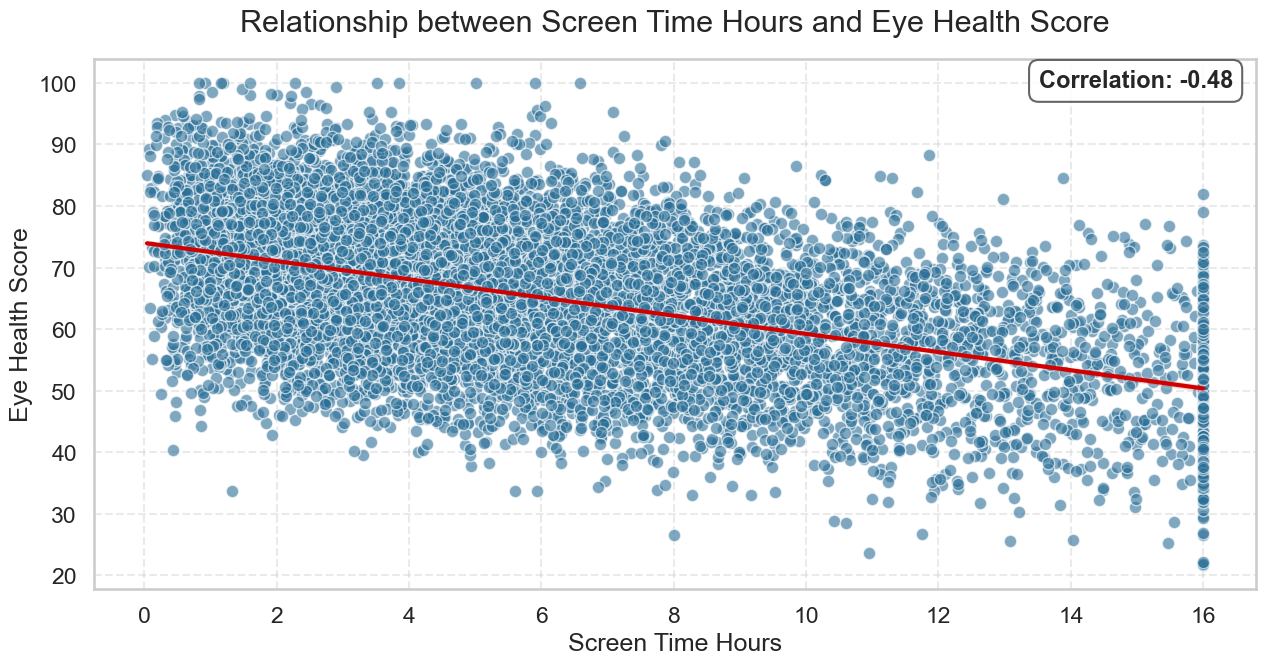

In [29]:
plot_inverse_relationship(df, "screen_time_hours", "eye_health_score")

The figure shows a moderate negative relationship between screen time and eye health, as indicated by the downward trend and a correlation of approximately −0.48. On average, higher screen time is associated with lower eye health scores, although the wide dispersion of points suggests substantial individual variability. This indicates that while screen exposure appears to be an important factor, other variables likely also influence eye health outcomes.

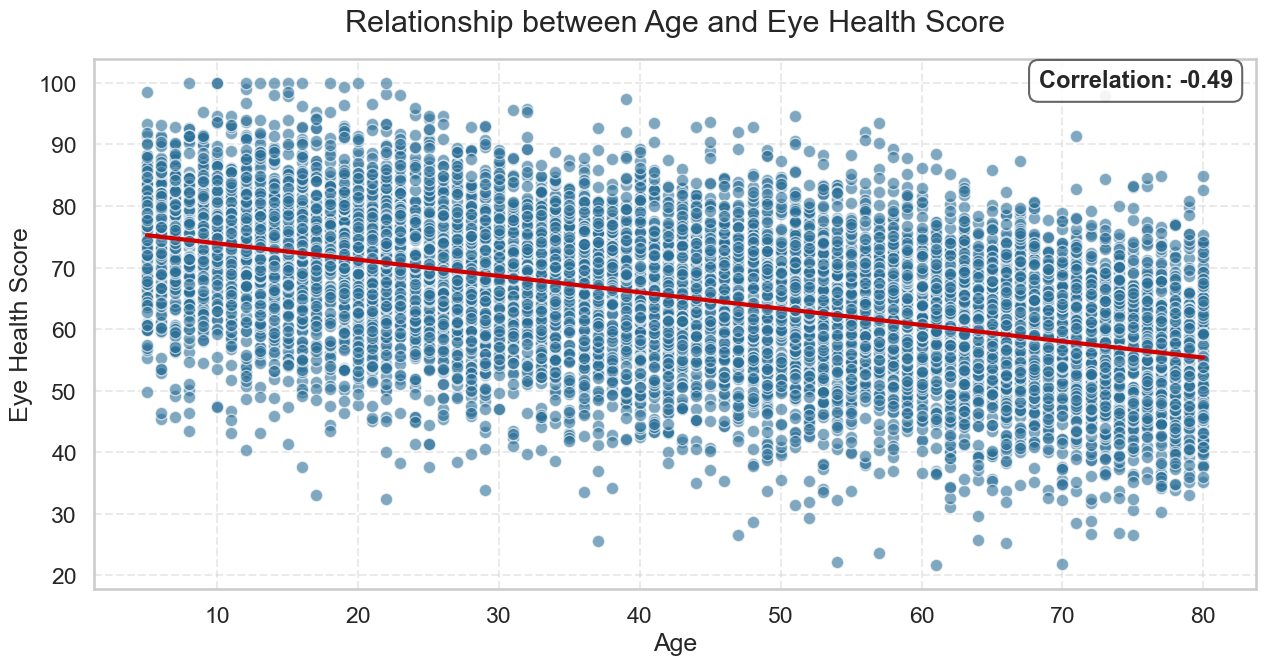

In [30]:
plot_inverse_relationship(df, "age", "eye_health_score")

The figure shows a moderate negative relationship between age and eye health score, with a correlation of approximately −0.49. On average, eye health tends to decline as age increases, as indicated by the downward trend line. However, the wide dispersion of observations suggests considerable individual variability, meaning that age alone does not fully explain differences in eye health outcomes and that additional factors are likely involved.

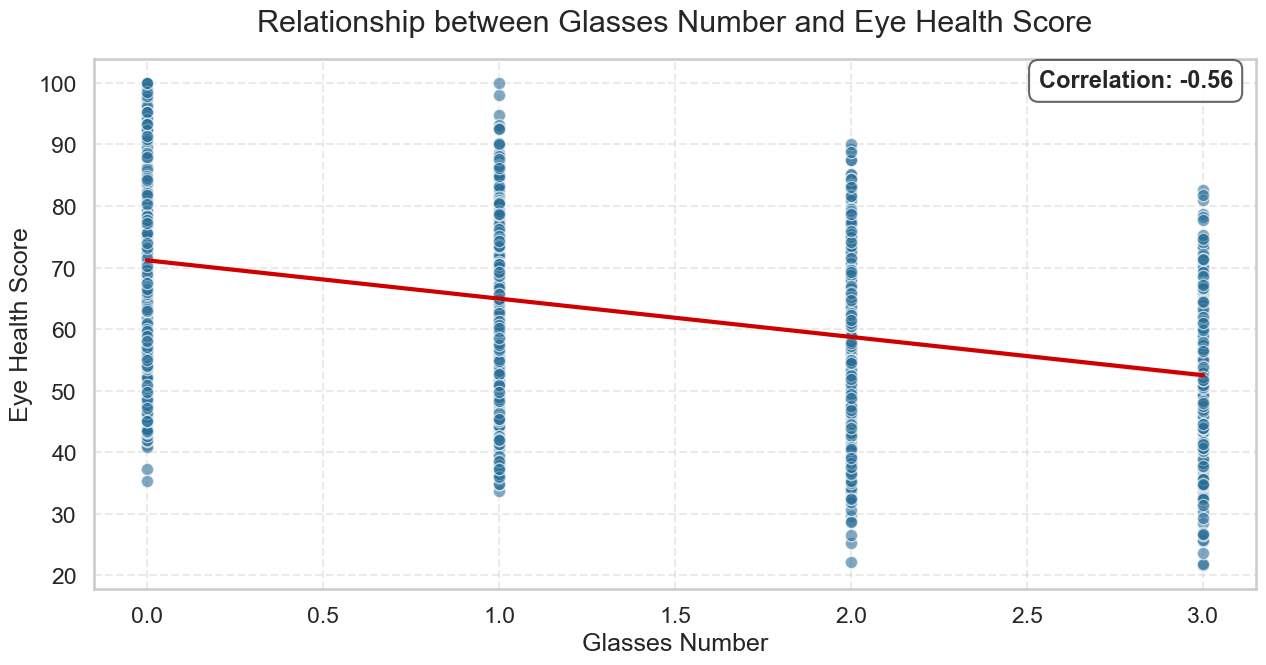

In [31]:
plot_inverse_relationship(df, "glasses_number", "eye_health_score")

The figure indicates a moderate negative relationship between the number of glasses worn and the eye health score, with a correlation of approximately −0.56. As the number of glasses increases, the average eye health score tends to decrease, as reflected by the downward-sloping trend line. Compared to the previous graphs, this relationship appears slightly stronger in magnitude.

However, the dispersion of observations within each category suggests that there is still considerable variability in eye health among individuals with the same number of glasses. This implies that while the use of glasses is associated with lower eye health scores, it does not fully explain the differences observed across individuals.